In [ ]:
#Use the following dataset and classify tweets into positive and negative tweets.
#https://www.kaggle.com/ruchi798/data-science-tweets

In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# regular expression
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/tweets/data_analysis.csv')
df2 = pd.read_csv('/content/drive/MyDrive/tweets/data_science.csv')
df3 = pd.read_csv('/content/drive/MyDrive/tweets/data_visualization.csv')

<ipython-input-8-54c6e1678430>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/tweets/data_analysis.csv')
<ipython-input-8-54c6e1678430>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/tweets/data_science.csv')
<ipython-input-8-54c6e1678430>:3: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/drive/MyDrive/tweets/data_visualization.csv')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39116 non-null  int64  
 1   conversation_id  39116 non-null  int64  
 2   created_at       39116 non-null  object 
 3   date             39116 non-null  object 
 4   time             39116 non-null  object 
 5   timezone         39116 non-null  int64  
 6   user_id          39116 non-null  int64  
 7   username         39116 non-null  object 
 8   name             39116 non-null  object 
 9   place            92 non-null     object 
 10  tweet            39116 non-null  object 
 11  language         39116 non-null  object 
 12  mentions         39116 non-null  object 
 13  urls             39116 non-null  object 
 14  photos           39116 non-null  object 
 15  replies_count    39116 non-null  int64  
 16  retweets_count   39116 non-null  int64  
 17  likes_count 

In [ ]:
#1st 5 and last 5 tweets
df1['tweet']

0        Join @SPJ_IC at 6 p.m. EDT Tuesday for the nex...
1        READ: Resilience, hard work, and perseverance ...
2        How will the shift to streaming impact movie-m...
3        (2/2) to gain the aptitude to find better solu...
4        Alexander Lukashenko is still in power in Bela...
                               ...                        
39111    #Hiring a Research-Data Analysis Intern in Was...
39112    [Interesante] 'The Cooperative Association for...
39113    Fellow writers: ever feel like ur head is so o...
39114    RT @newsycombinator: How to speed up massive d...
39115    Microsoft Project 2010 Conference: Dan Feigenb...
Name: tweet, Length: 39116, dtype: object

In [ ]:
#tweet at index 10
df1['tweet'][10]

'The DDMS project, funded by @smart_eureka through @Entirl, looks to help #manufacturing companies to improve their asset #maintenance strategy, by exploiting the potential of #dataanalysis of #machinedata in maintenance.   https://t.co/a5RxKxBbDT'

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
sentence = df1['tweet'][0]
sid.polarity_scores(sentence)['compound']

0.0772

In [ ]:
def cleaner(tweet):
  #remove @ sign in tweets (mentions) 
  tweet = re.sub("@[A-Za-z0-9]+","",tweet)

  #remove http and https links from the tweet
  tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)

  #remove # sign but keep the text from the tweet
  tweet = " ".join(tweet.split())
  tweet = tweet.replace("#", "").replace("_", " ")

  tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
      if w.lower() in words or not w.isalpha())
  return tweet

df1['tweet_clean'] = df1['tweet'].apply(cleaner)

In [ ]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in df1['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df1['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df1['sentiment_category'] = df1['sentiment'].apply(sentiment_category)

In [ ]:
df1 = df1[['tweet','date','id','sentiment','sentiment_category']]
df1.head()

,tweet,date,id,sentiment,sentiment_category
0,Join @SPJ_IC at 6 p.m. EDT Tuesday for the nex...,2021-06-20,1406397735792791556,-0.1779,negative
1,"READ: Resilience, hard work, and perseverance ...",2021-06-19,1406057066058313733,0.3400,positive
2,How will the shift to streaming impact movie-m...,2021-06-19,1405965100993986561,0.4019,positive
3,(2/2) to gain the aptitude to find better solu...,2021-06-18,1405935463374991366,0.7430,positive
4,Alexander Lukashenko is still in power in Bela...,2021-06-18,1405918849329991694,0.0000,neutral


In [ ]:
neg = df1[df1['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = df1[df1['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()


In [ ]:
# filter the df to only capture Tweets from the start of May to end of June

newdf = df1[(df1['date']>='2019-05-01') & (df1['date']<='2019-06-29')]

neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['date'],as_index=False).count()

pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['date'],as_index=False).count()

pos = pos[['date','id']]
neg = neg[['date','id']]

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

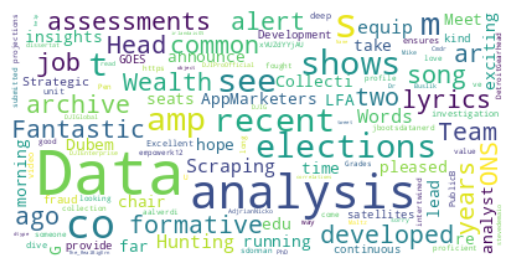

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df4 = df1[(df1['date']>='2019-05-11') & (df1['date']<='2019-05-14')]
positive = df4[df4['sentiment_category']=='positive']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(positive['tweet']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
print(df1[df1['sentiment_category']=='positive'])

                                                   tweet        date  \
1      READ: Resilience, hard work, and perseverance ...  2021-06-19   
2      How will the shift to streaming impact movie-m...  2021-06-19   
3      (2/2) to gain the aptitude to find better solu...  2021-06-18   
8      @jplude22 @DJIGlobal We are sorry for the mish...  2021-06-18   
10     The DDMS project, funded by @smart_eureka thro...  2021-06-18   
...                                                  ...         ...   
39101  Time for some good old fashioned data analysis...  2010-01-18   
39102  Innovative releases Encore Reporter, a data an...  2010-01-18   
39106  Does anyone have access to an NVivo license, o...  2010-01-13   
39110  Tweets about Obama:  http://neoformix.com/2010...  2010-01-09   
39113  Fellow writers: ever feel like ur head is so o...  2010-01-06   

                        id  sentiment sentiment_category  
1      1406057066058313733     0.3400           positive  
2      1405965100

In [ ]:
print(df1[df1['sentiment_category']=='negative'])

                                                   tweet        date  \
0      Join @SPJ_IC at 6 p.m. EDT Tuesday for the nex...  2021-06-20   
5      IN-DEPTH: Alexander Lukashenko, the autocratic...  2021-06-18   
16     A lot has been made of the sourcing and data a...  2021-06-18   
24     @NOAA and partners create a new product to ass...  2021-06-17   
35     Tomorrow’s international donors’ conference fo...  2021-06-16   
...                                                  ...         ...   
39077  XKCD today shows the danger of doing data anal...  2010-02-12   
39091  Data analysis on NM swine flu cases released -...  2010-01-29   
39092  Data analysis on NM swine flu cases released- ...  2010-01-28   
39096  Applying for a summer job programming and desi...  2010-01-22   
39109  How much have state unemployment rates grown s...  2010-01-11   

                        id  sentiment sentiment_category  
0      1406397735792791556    -0.1779           negative  
5      1405913177